In [47]:
function collatz(n) # unproven: always terminates
    k = 0
    while n > 1
        n = isodd(n) ? 3n+1 : n>>1
        k += 1
    end
    return k
end

collatz (generic function with 1 method)

In [48]:
collatz(13254235457)


326

In [32]:
for i = 2:1:100
    α = collatz(i)
    if α > 300
        println("$i = $α")
    end
end

In [34]:
@time for i = 1:1e6 collatz(18) end

elapsed time: 0.160193787 seconds (96 bytes allocated)


In [33]:
@code_native collatz(123)

	.section	__TEXT,__text,regular,pure_instructions
Filename: In[30]
Source line: 4
	push	RBP
	mov	RBP, RSP
	xor	EAX, EAX
	cmp	RDI, 2
	jl	176
	movabs	RCX, 4725785072
	movsd	XMM0, QWORD PTR [RCX]
	movabs	R8, -9223372036854775808
	movabs	RDX, 4602678819172646912
	movabs	RCX, 4725785080
	movsd	XMM1, QWORD PTR [RCX]
	movabs	RSI, 4725785088
Source line: 4
	test	DIL, 1
	jne	90
	cvtsi2sd	XMM2, RDI
	mulsd	XMM2, XMM0
	movq	RCX, XMM2
	mov	RDI, RCX
	shr	RDI, 52
	and	RDI, 2047
	add	RDI, -1022
	cmp	RDI, 52
	ja	15
	and	RCX, R8
	or	RCX, RDX
	movq	XMM3, RCX
	addsd	XMM2, XMM3
	ucomisd	XMM1, XMM2
	jb	40
	ucomisd	XMM2, QWORD PTR [RSI]
	jb	30
	cvttsd2si	RDI, XMM2
	jmpq	5
	lea	RDI, QWORD PTR [RDI + 2*RDI + 1]
Source line: 5
	inc	RAX
	cmp	RDI, 1
	jg	-118
Source line: 7
	pop	RBP
	ret
Source line: 4
	movabs	RAX, 4412131792
	mov	RDI, QWORD PTR [RAX]
	movabs	RAX, 4398922992
	mov	ESI, 4
	call	RAX


In [7]:
function mandel(z)
    c = z
    maxiter = 80
    for n = 1:maxiter
        if abs(z) > 2
            return n-1
        end
        z = z^2 + c
    end
    return maxiter
end

mandel (generic function with 1 method)

In [42]:
# Returns the number of iterations a points takes to go to infite on a mandelbrot set
function mandel_pt(c, MAX_ITER=100)
    iter = 0
    z    = 0
    while (iter < MAX_ITER)
        z = z^2 + c
        iter+= 1
        if abs(z) > 2.0
            return iter
        end
    end
    100
end;

In [43]:
# Return the Mandelbrot set by mapping each point to the corresponding number of iterations
mandel(zmin, zmax, resolution=1000) =
    [ mandel_pt(complex(j, i)) for i=linspace(zmin.im, zmax.im, resolution), j=linspace(zmin.re, zmax.re, resolution) ];

In [44]:
# The complex plane to map
(zmin, zmax) = (-2.2-1.5im, +1.2+1.5im)

# The Mandelbrot set
mandel_set = mandel(zmin, zmax);

In [45]:
mandel_set


1000x1000 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1

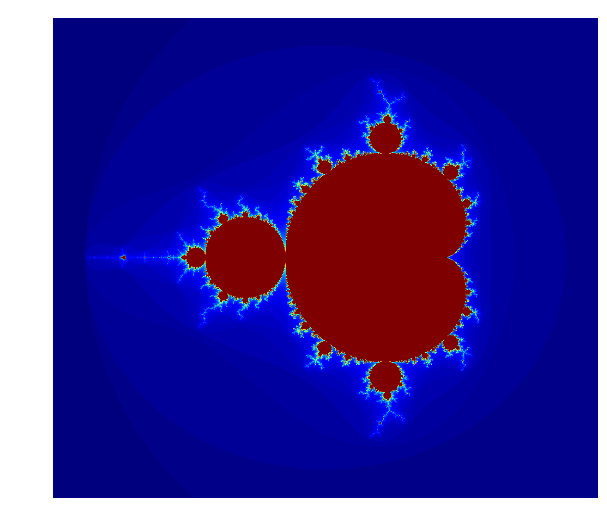

In [46]:
# import basic library
using PyPlot;

# Auxiliary function to map the complex rectagle to an array
to_extent(zmin, zmax) = [zmin.re, zmax.re, zmin.im, zmax.im]

# Plot it
axis("off")
imshow(mandel_set, extent=to_extent(zmin, zmax));

In [40]:
# The complex plane to map
(zmin, zmax) = (-0.676+0.005im, +1.076+0.405im)


# The Mandelbrot set
mandel_set = mandel(zmin, zmax);


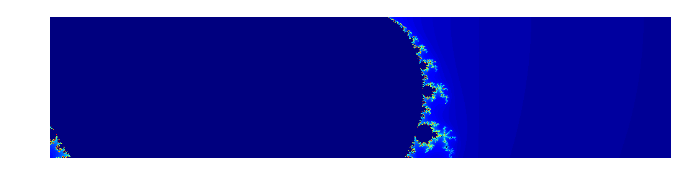

In [41]:
# import basic library
using PyPlot;


# Auxiliary function to map the complex rectagle to an array
to_extent(zmin, zmax) = [zmin.re, zmax.re, zmin.im, zmax.im]

# Plot it
axis("off")
imshow(mandel_set, extent=to_extent(zmin, zmax));